In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [6]:
df  = pd.read_csv("Processed_data.csv")
sns.set(style="whitegrid")
df.head(2)

,Uniq Id,Product Id,Product Category,Product Brand,Product Name,Product Price,Product Description,Product Currency,Product Tags,Product Reviews Count,Crawl_date,Crawl_time,rating_for_model,Product_image_Url_jpeg
0,752,4489,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95,NaN,USD,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",29.073529,2020-09-24,03:21:12,4.218750,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...
1,3830,3370,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",29.86,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,USD,"Nice 'n Easy Permanent Color, 111 Natural Medi...",6998.333333,2020-10-30,14:04:08,3.966667,https://i5.walmartimages.com/asr/9c8e42e4-13a5...


In [11]:
## Checking for Outliers 

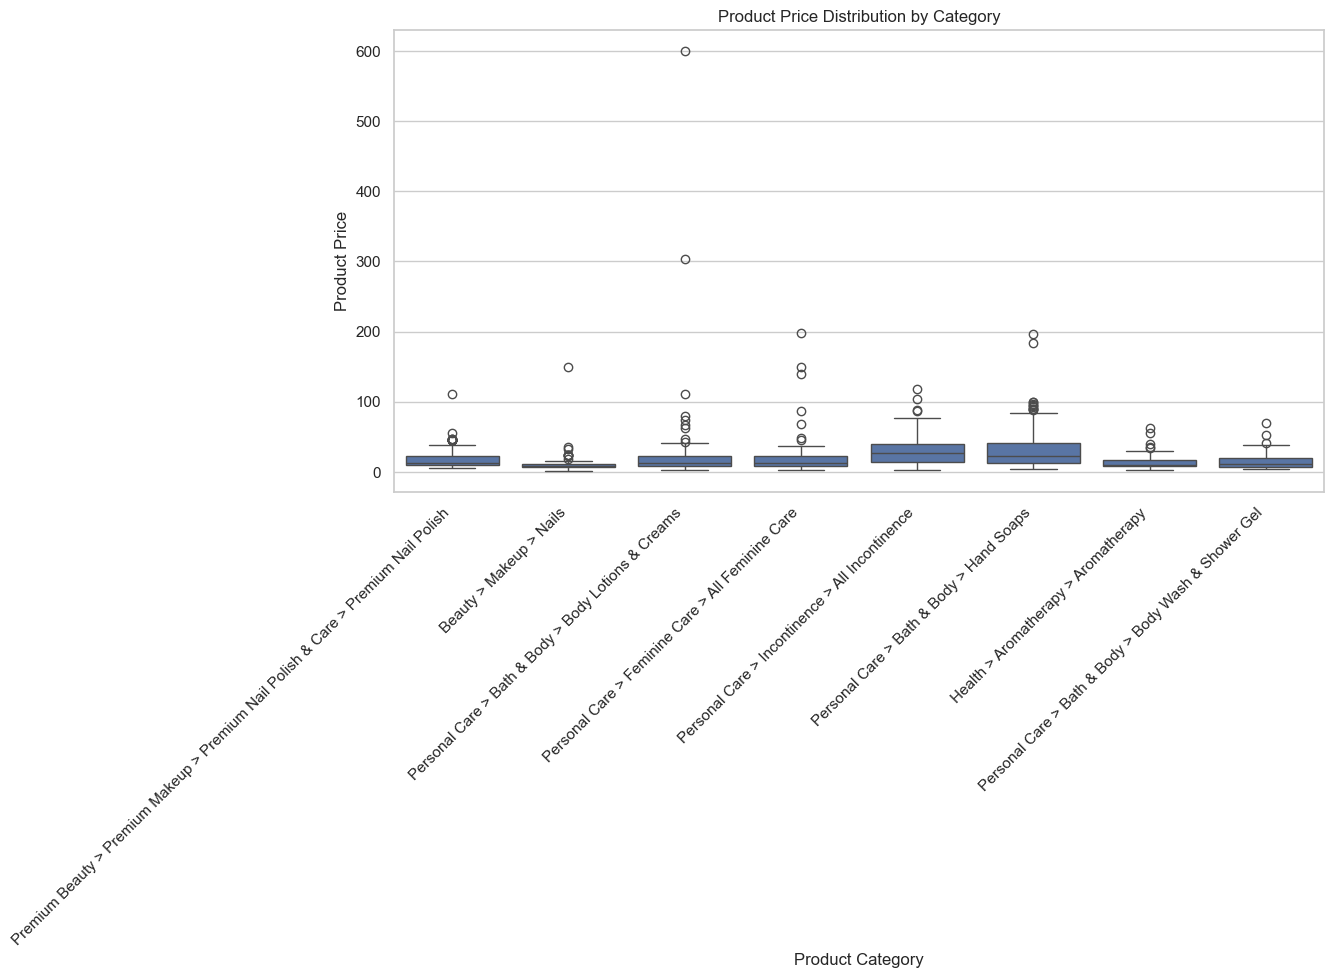

In [12]:
top_categories = df['Product Category'].value_counts().head(8).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Product Category'].isin(top_categories)],x='Product Category',y='Product Price')

plt.xticks(rotation=45, ha='right')
plt.title('Product Price Distribution by Category')
plt.show()

In [13]:
# it reveals the structure in skewed price data

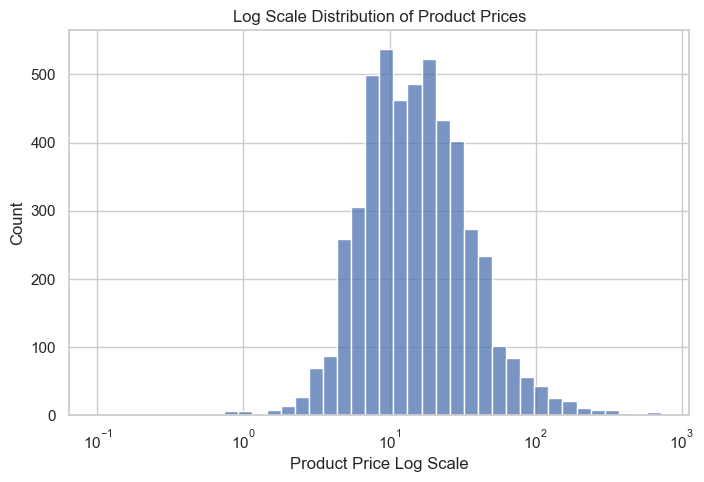

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Product Price'], bins=40, log_scale=True)
plt.title('Log Scale Distribution of Product Prices')
plt.xlabel('Product Price Log Scale')
plt.show()


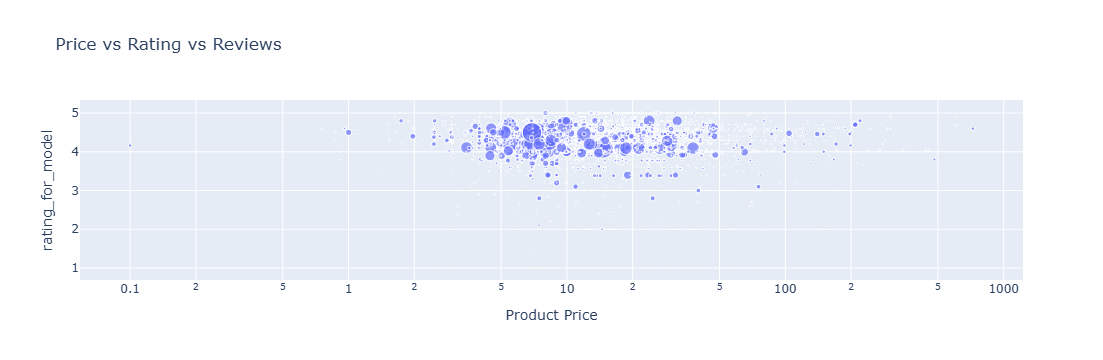

In [17]:
fig = px.scatter(df,x='Product Price',y='rating_for_model',
    size='Product Reviews Count',hover_name='Product Name',log_x=True,
    title='Price vs Rating vs Reviews')

fig.show()

In [18]:
## Price distribution by Brand  - it shows Shows density and  distribution

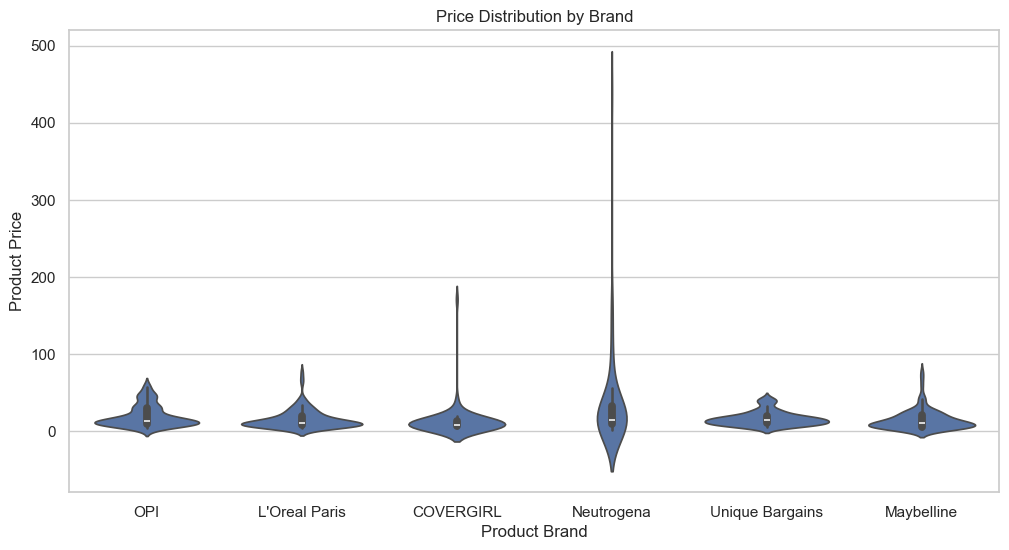

In [19]:
top_brands = df['Product Brand'].value_counts().head(6).index

plt.figure(figsize=(12,6))
sns.violinplot(
    data=df[df['Product Brand'].isin(top_brands)],
    x='Product Brand',
    y='Product Price'
)
plt.title('Price Distribution by Brand')
plt.show()


In [20]:
## Distribution of product prices 

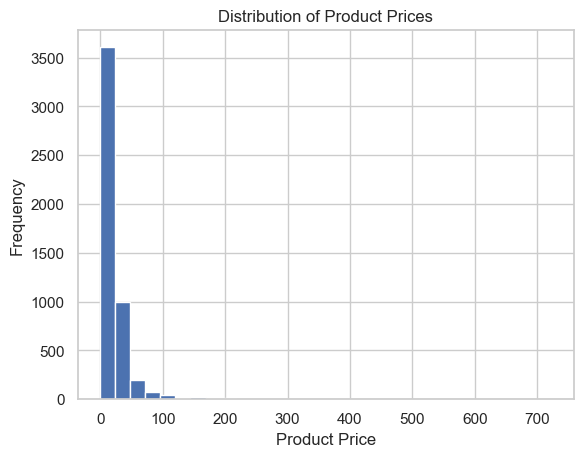

In [21]:
plt.figure()
plt.hist(df['Product Price'], bins=30)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()


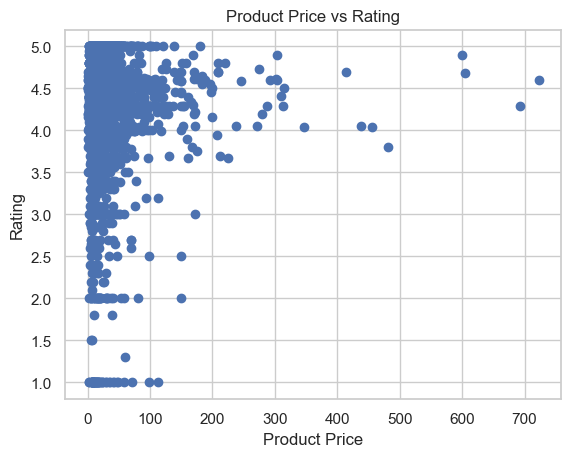

In [23]:
plt.figure()
plt.scatter(df['Product Price'], df['rating_for_model'])
plt.title('Product Price vs Rating')
plt.xlabel('Product Price')
plt.ylabel('Rating')
plt.show()


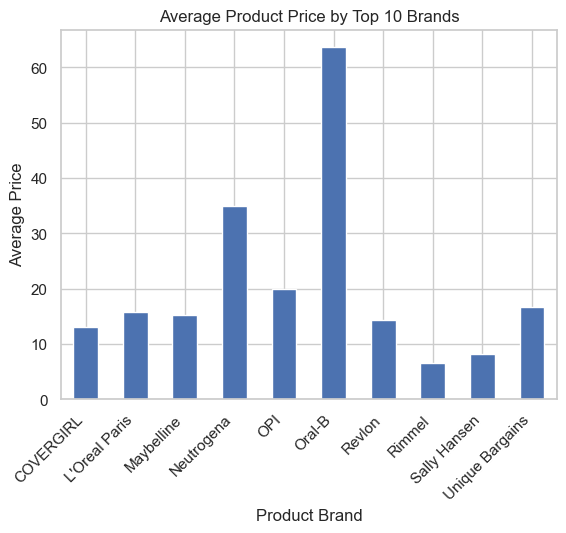

In [26]:
top_brands = df['Product Brand'].value_counts().head(10).index

avg_price_by_brand = (
    df[df['Product Brand'].isin(top_brands)]
    .groupby('Product Brand')['Product Price']
    .mean()
)

plt.figure()
avg_price_by_brand.plot(kind='bar')
plt.title('Average Product Price by Top 10 Brands')
plt.xlabel('Product Brand')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Price')
plt.show()


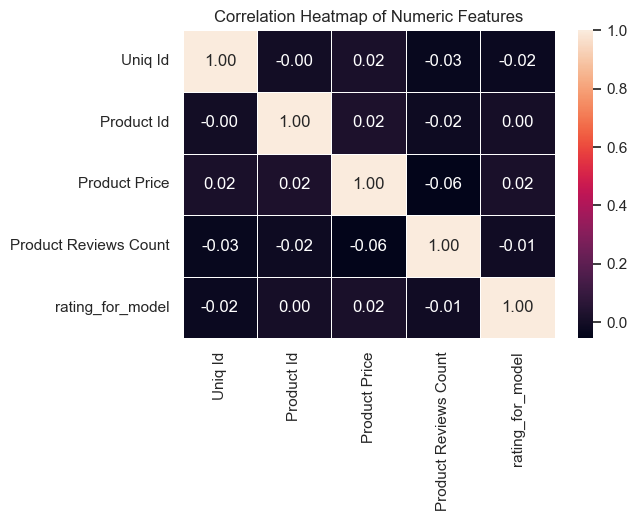

In [32]:
# It shows how numerical columns are related to each other by measuring and visualizing their relationships in a heatmap

numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


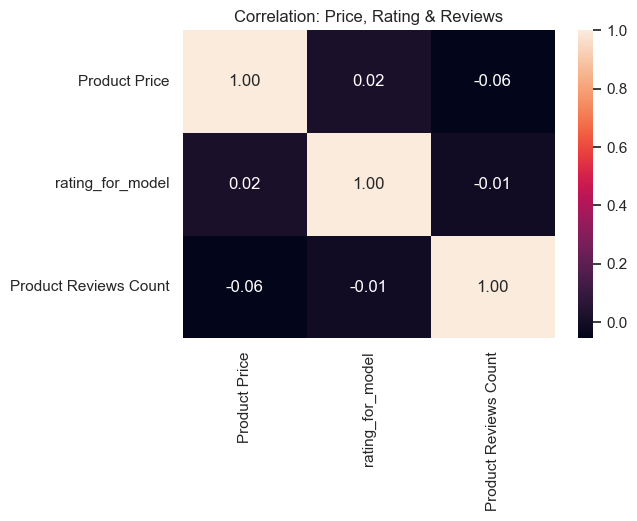

In [34]:
# checks and visualizes how product price, ratings, and review counts are related to each other using a correlation heatmap

selected_features = df[['Product Price', 'rating_for_model', 'Product Reviews Count']]

plt.figure(figsize=(6,4))
sns.heatmap(
    selected_features.corr(),
    annot=True,
    fmt=".2f"
)
plt.title('Correlation: Price, Rating & Reviews')
plt.show()
